<a href="https://colab.research.google.com/github/ammirsm/PyVision/blob/master/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget "https://github.com/ammirsm/PyVision/raw/master/opencv/table.png"


--2020-01-03 09:47:33--  https://github.com/ammirsm/PyVision/raw/master/opencv/table.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ammirsm/PyVision/master/opencv/table.png [following]
--2020-01-03 09:47:34--  https://raw.githubusercontent.com/ammirsm/PyVision/master/opencv/table.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127379 (124K) [image/png]
Saving to: ‘table.png.1’

table.png.1         100%[===================>] 124.39K  --.-KB/s    in 0.04s   

2020-01-03 09:47:35 (3.05 MB/s) - ‘table.png.1’ saved [127379/127379]



In [13]:
!ls

sample_data  table.png	table.png.1


In [14]:
pip install opencv-python

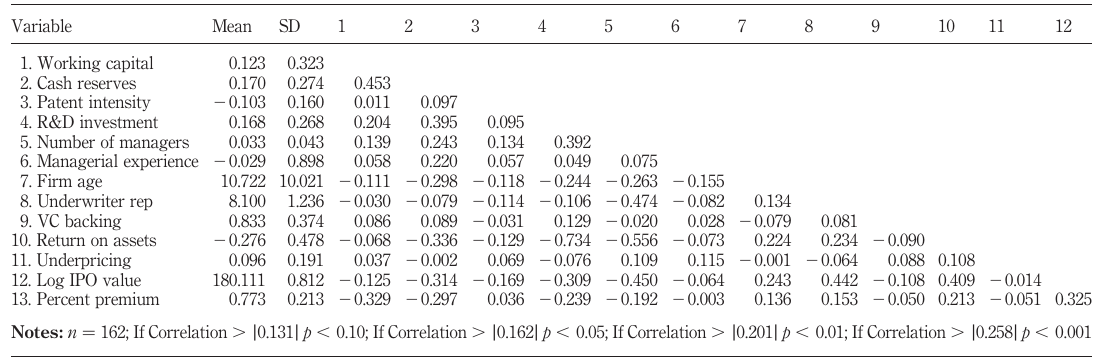

-1

In [15]:
# import the necessary packages
from google.colab.patches import cv2_imshow
import imutils
import cv2
import numpy as np

# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread('table.png')
cv2_imshow(image)
cv2.waitKey(0)


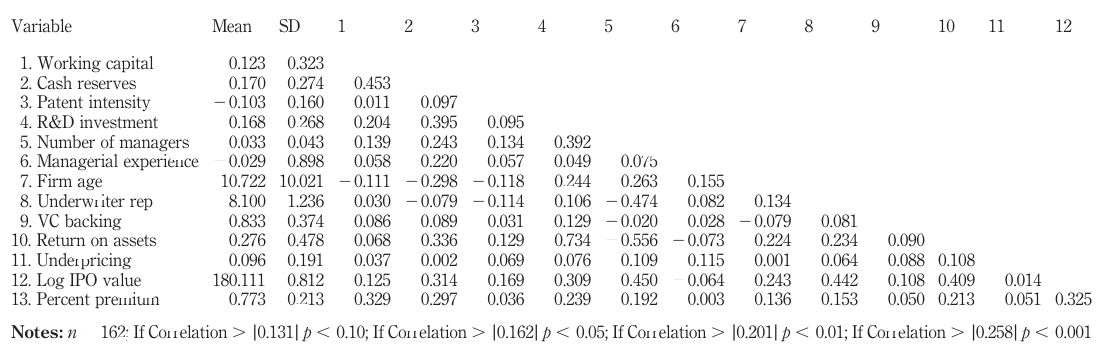

-1

In [16]:

# convert the image to grayscale
thresh = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(thresh, 50, 150, apertureSize=3)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edged, 1, np.pi / 180, 100, minLineLength, maxLineGap)
for i in lines:
    for x1, y1, x2, y2 in i:
        cv2.line(thresh, (x1, y1), (x2, y2), (255, 255, 0), 2)
cv2_imshow(thresh)
cv2.waitKey(0)


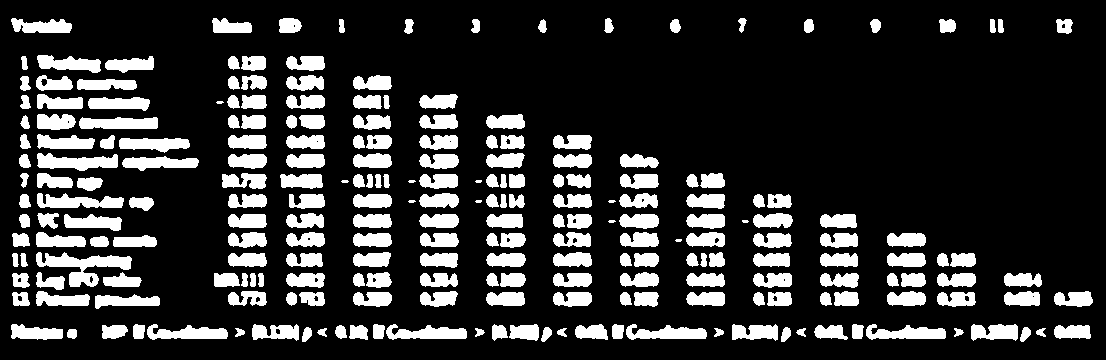

-1

In [17]:

thresh = cv2.GaussianBlur(thresh,(11,11),0)

thresh = cv2.threshold(thresh, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)
cv2.waitKey(0)



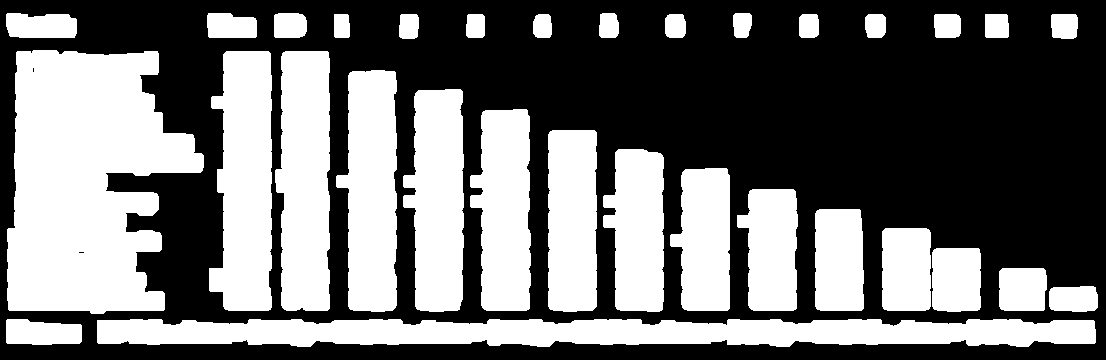

-1

In [18]:

# similarly, dilations can increase the size of the ground objects
thresh = thresh.copy()
thresh = cv2.dilate(thresh, None, iterations=5)
cv2_imshow(thresh)
cv2.waitKey(0)


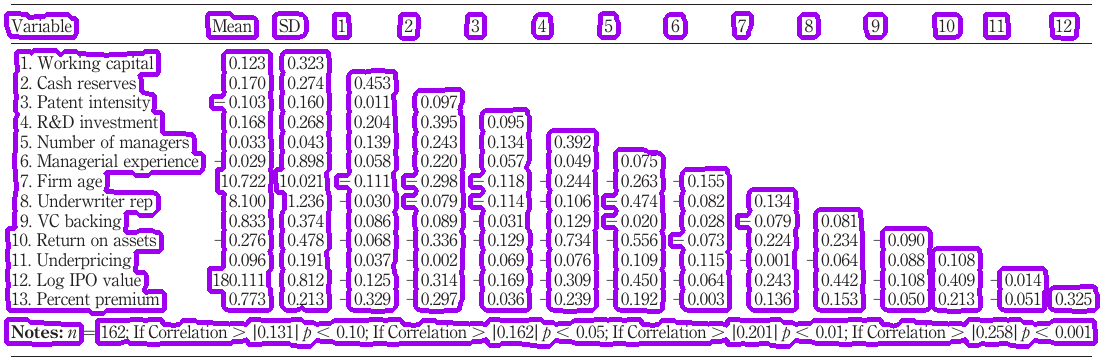

-1

In [19]:

# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if imutils.is_cv2() else cnts[1]
output = image.copy()

# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)

cv2_imshow(output)
cv2.waitKey(0)


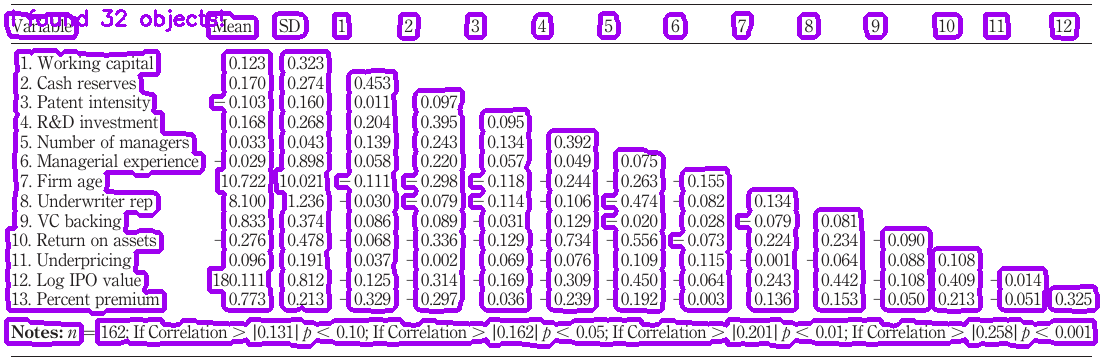

-1

In [20]:

# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (240, 0, 159), 2)
cv2_imshow(output)
cv2.waitKey(0)


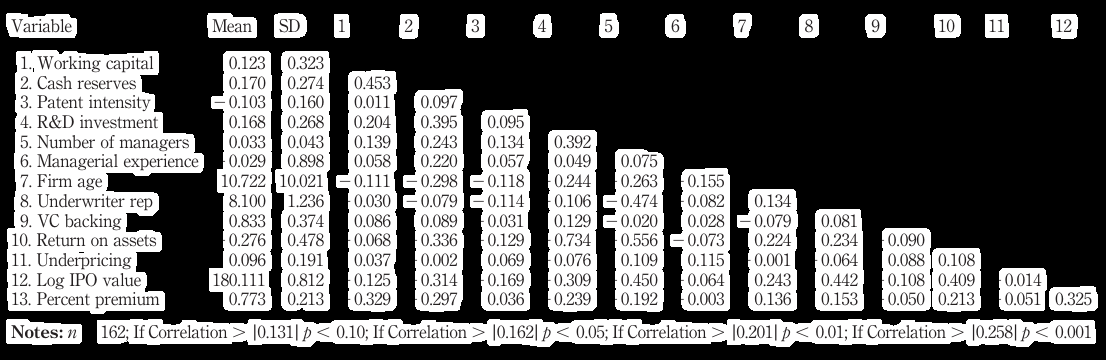

-1

In [21]:

# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)
cv2.waitKey(0)